# Import Libraries

In [1]:
import numpy as np
import pandas as pd

import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

import re

import warnings 
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)

# Load Dataset

In [2]:
df_cust = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv')
df_geolocation = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv')
df_order_items = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv')
df_order_payments = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv')
df_order_reviews = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv')
df_orders = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv')
df_products = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv')
df_sellers = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv')
df_cat = pd.read_csv('/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv')

In [3]:
print('Customers Data Shape:',df_cust.shape)
display(df_cust.head())

Customers Data Shape: (99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


`df_cust`:

This table contains information about customers. Each row in the table represents a customer, with each customer identified by attributes or features represented by the columns in the table.

| Features | Description |
|-|-|
|`customer_id`| A unique code for each customer transaction or interaction |
|`customer_unique_id`| A unique code for each customer |
|`customer_zip_code_prefix`| The postal code prefix for the customer's address |
|`customer_city`| The city of the customer. |
|`customer_state`| The state of the customer. |

In [4]:
print('Geolocation Data Shape:',df_geolocation.shape)
display(df_geolocation.head())

Geolocation Data Shape: (1000163, 5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


`df_geoloc`: 

This table contains data that identifies the geographical position in the real world or the physical location of various objects through GPS coordinates. Each row represents a unique geographical position.

| Features | Description |
|-|-|
|`geolocation_zip_code_prefix`| Prefix of the Brazilian zip code (CEP) for a specific area |
|`geolocation_lat`| Latitude coordinate of the location |
|`geolocation_lng`| Longitude coordinate of the location |
|`geolocation_city`| Name of the city corresponding to the geolocation |
|`geolocation_state`| Name of the state corresponding to the geolocation |

In [5]:
print('Order Items Data Shape:',df_order_items.shape)
display(df_order_items.head())

Order Items Data Shape: (112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


`df_order_items`:

The table contains information about items ordered in an e-commerce system. Each row represent an item within an order.

| Features | Description |
|-|-|
|`order_id`| Unique identifier for the order. |
|`order_item_id`| A sequential number identifying each item within an order |
|`product_id`|  Unique identifier for the product |
|`seller_id`| Unique identifier for the seller of the product |
|`shipping_limit_date`| The deadline date for the product to be shipped |
|`price`| The price of the product |
|`freight_value`| The shipping cost for the product |

In [6]:
print('Order Payments Data Shape:',df_order_payments.shape)
display(df_order_payments.head())

Order Payments Data Shape: (103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


`df_order_payments`: 

This table contains information about payments made for orders in e-commerce. Each row represents a unique payment transaction, detailing how customers paid for their orders.

| Feature | Description |
|-|-|
| `order_id` | Unique identifier for each order |
| `payment_sequential` | Sequence number if there are multiple payments for an order |
| `payment_type` | The method of payment (e.g., credit card, boleto, voucher) |
| `payment_installments` | Number of payment installments with a credit card |
| `payment_value` | Total value paid for the order |

In [7]:
print('Order Reviews Data Shape:',df_order_reviews.shape)
display(df_order_reviews.head())

Order Reviews Data Shape: (99224, 7)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


`df_order_reviews`: 

This table contains information about the reviews left by customers for orders they placed on an e-commerce platform. Each row represents a customer feedback on their orders.

| Feature | Description |
|-|-|
| `review_id` | Unique identifier for each review |
| `order_id` | Unique identifier for the order being reviewed |
| `review_score` | The review score given by the customer, scale from 1 to 5 |
| `review_comment_title` | Title of the review comment, if any |
| `review_comment_message` | Detailed comment or message left by the customer as part of the review |
| `review_creation_date` | The date and time when the review was created |
| `review_answer_timestamp` | Timestamp when the review was responded to by the seller or the platform |

In [8]:
print('Orders Data Shape:',df_orders.shape)
display(df_orders.head())

Orders Data Shape: (99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


`df_orders`: 

This table contains information regarding orders placed by customers on e-commerce platforms. Each row represents one unique order from customers.

| Feature | Description |
|-|-|
| `order_id` | Unique identifier for each order |
| `customer_id` | Unique identifier for the customer who placed the order |
| `order_status` | Current status of the order (e.g., delivered, shipped, cancelled) |
| `order_purchase_timestamp` | Timestamp when the order was placed |
| `order_approved_at` | Timestamp when the order was approved |
| `order_delivered_carrier_date` | Timestamp when the order was handed over to the delivery carrier |
| `order_delivered_customer_date` | imestamp when the order was delivered to the customer |
| `order_estimated_delivery_date` | Estimated date for order delivery |

In [9]:
print('Products Data Shape:',df_products.shape)
display(df_products.head())

Products Data Shape: (32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


`df_products`: 

The table contains collection of product data from e-commerce platforms that contains information about various products such as product descriptions or sizes.

| Feature | Description |
|-|-|
| `product_id` | Unique identifier for each product |
| `product_category_name` | The category to which the product belongs |
| `product_name_lenght` | Length of the product name |
| `product_description_lenght` | Length of the product description |
| `product_photos_qty` | Quantity of photos available for the product |
| `product_weight_g` | Weight of the product in grams |
| `product_length_cm` | Length of the product in centimeters |
| `product_height_cm` | Height of the product in centimeters|
| `product_width_cm` | Width of the product in centimeters |

In [10]:
print('Sellers Data Shape:',df_sellers.shape)
display(df_sellers.head())

Sellers Data Shape: (3095, 4)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


`df_sellers`: 

This table contains information about sellers registered on the e-commerce platform. Each row provides details about a single seller.

| Feature | Description |
|-|-|
| `seller_id` | Unique identifier for each seller |
| `seller_zip_code_prefix` | The zip code prefix for the seller's address |
| `seller_city` | The city where the seller is located |
| `seller_state` | The state where the seller is located |

In [11]:
df_cat.head()
print('Product Category Data Shape:',df_cat.shape)
display(df_cat.head())

Product Category Data Shape: (71, 2)


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


`df_cat`: 

The table contains product category name translation dataset, used to translate product category names from Portuguese to English

| Feature | Description |
|-|-|
| `product_category_name` | Original category name in Portuguese |
| `product_category_name_english` | Translated category name in English |

# Data Cleaning

In [12]:
# Define a function to generate a summary DataFrame of data characteristics
def skimming_data(data):
    # Create a DataFrame 'skimmed_data' with columns to capture various data characteristics
    skimmed_data = pd.DataFrame({
        'feature': data.columns.values,  # Column names
        'data_type': data.dtypes.values,  # Data types of columns
        'null_value(%)': data.isna().mean().values * 100,  # Percentage of missing values
        'neg_value(%)': [len(data[col][data[col] < 0]) / len(data) * 100 if col in data.select_dtypes(include=[np.number]).columns else 0 for col in data.columns],  # Percentage of negative values for numeric columns
        '0_value(%)': [len(data[col][data[col] == 0]) / len(data) * 100 if col in data.select_dtypes(include=[np.number]).columns else 0 for col in data.columns],  # Percentage of zero values for numeric columns
        'duplicate': data.duplicated().sum(),  # Number of duplicated rows
        'n_unique': data.nunique().values,  # Number of unique values for each column
        'sample_unique': [data[col].unique() for col in data.columns]  # Sample unique values for each column
    })
    
    # Round the values in the summary DataFrame to 3 decimal places
    return skimmed_data.round(3)

In [13]:
# Filter invalid city names based on pattern
def filtered_city(data, col):
    pattern = re.compile("[^a-z\sA-Z0-9-\'+]")
    filtered_df = data[data[col].str.contains(pattern)]
    return filtered_df

## Geolocation Data

In [14]:
skimming_data(df_geolocation)

,feature,data_type,null_value(%),neg_value(%),0_value(%),duplicate,n_unique,sample_unique
0,geolocation_zip_code_prefix,int64,0.0,0.000,0.0,261831,19015,"[1037, 1046, 1041, 1035, 1012, 1047, 1013, 102..."
1,geolocation_lat,float64,0.0,99.866,0.0,261831,717360,"[-23.54562128115268, -23.54608112703553, -23.5..."
2,geolocation_lng,float64,0.0,100.000,0.0,261831,717613,"[-46.63929204800168, -46.64482029837157, -46.6..."
3,geolocation_city,object,0.0,0.000,0.0,261831,8011,"[sao paulo, são paulo, sao bernardo do campo, ..."
4,geolocation_state,object,0.0,0.000,0.0,261831,27,"[SP, RN, AC, RJ, ES, MG, BA, SE, PE, AL, PB, C..."


`Findings`

- **Data Types**: The dataset contains a mix of data types. `geolocation_zip_code_prefix` is of type int64, which is appropriate for zip codes. `geolocation_lat` (latitude) and `geolocation_lng` (longitude) are of type float64, which is suitable for geographical coordinates. `geolocation_city` and `geolocation_state` are of type object, indicating that they are likely string values representing geographical names.

- **No Missing or Zero Values**: None of the columns contain null or 0 values. This indicates good data integrity for these fields.

- **Negative Value**: The geolocation_lat and geolocation_lng columns show almost all values as negative (99% and 100%, respectively). This is actually expected for coordinates in Brazil, as it is located in the Western Hemisphere (negative longitude) and mostly in the Southern Hemisphere (negative latitude).

- **Duplicates**: The dataset has a very large number of duplicate rows (261,831), which suggests either a data entry issue or that the data collection process captured multiple entries for the same geolocation points.

In [15]:
# Drop duplicates data
df_geolocation.drop_duplicates(inplace=True)
df_geolocation.duplicated().sum()

0

In [16]:
df_geolocation['geolocation_city'].value_counts()

geolocation_city
sao paulo               79927
rio de janeiro          35177
são paulo               19718
belo horizonte          19474
curitiba                11263
                        ...  
porto sao jose              1
riachão do bacamarte        1
riachao do bacamarte        1
algodão de jandaíra         1
luziapolis                  1
Name: count, Length: 8011, dtype: int64

`Findings`

In the `geolocation_city` column, there are many city names written in Portuguese with special characters, such as "São Paulo," which can lead to duplicates with "Sao Paulo." Therefore, before using references in the `geolocation_city` column, a cleaning process is required.

In [17]:
# function to replace non-standard special characters with standard characters in a string
def replace_char(city_name):
    city_name = re.sub(r'[ãââàáä]', 'a', city_name)
    city_name = re.sub(r'[íîì]', 'i', city_name)
    city_name = re.sub(r'[úûùü]', 'u', city_name)
    city_name = re.sub(r'[éêèë]', 'e', city_name)
    city_name = re.sub(r'[óõôòö]', 'o', city_name)
    city_name = re.sub(r'[ç]', 'c', city_name)
    return city_name

# Applying the function to clean 'geolocation_city' column
df_geolocation['geolocation_city'] = df_geolocation['geolocation_city'].apply(replace_char)

In [18]:
# Searching for city names that do not follow a pattern
filtered_city(df_geolocation, 'geolocation_city')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
106037,4728,-23.639872,-46.713571,sa£o paulo,SP
301807,13318,-23.293804,-45.959930,jacare (cabreuva),SP
302988,13318,-23.256983,-47.055205,jacare (cabreuva),SP
308945,13454,-22.734480,-47.380589,santa barbara d`oeste,SP
377210,17970,-21.269165,-51.668758,sao joao do pau d%26apos%3balho,SP
421038,21032,-22.857779,-43.252626,"rio de janeiro, rio de janeiro, brasil",RJ
491149,25970,-22.392335,-42.989392,´teresopolis,RJ
502643,27163,-22.467331,-43.829419,california da barra (barra do pirai),RJ
506885,27598,-22.411815,-44.553700,penedo (itatiaia),RJ
522746,28927,-22.622491,-42.004973,tamoios (cabo frio),RJ


`Findings`

There are still several city names that are invalid so replacement is needed

In [19]:
# Check a sample zip code
df_geolocation[df_geolocation['geolocation_zip_code_prefix']==45936].head(15)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
694783,45936,-12.883913,-38.478122,itabatan,BA
694790,45936,-17.999945,-39.868270,itabata,BA
694792,45936,-12.903227,-38.308831,itabata,BA
694832,45936,-12.921871,-38.491053,itabatan,BA
694905,45936,-18.000329,-39.867793,itabata,BA
694910,45936,-12.807618,-38.395391,itabata,BA
694939,45936,-18.010597,-39.864476,itabata,BA
694996,45936,-18.006772,-39.863218,itabata,BA
695000,45936,-14.670199,-40.489571,itabata,BA
695014,45936,-12.921859,-38.441688,itabata,BA


`Findings`

The `geolocation_zip_code_prefix` 45936 has various different city names such as 'itabatan,' 'itabata,' 'mucuri,' and 'itabatan (mucuri).' This indicates a variation or inconsistency in the geolocation data for a specific zip code prefix. This may have occurred due to data entry issues.

To clean and address the inconsistency in the `geolocation_city` column by replacing it with the mode value corresponding to the `geolocation_zip_code_prefix`.

In [20]:
# Cleaning all geolocation city
for i in df_geolocation['geolocation_zip_code_prefix'].unique():
    mode_city = df_geolocation[df_geolocation['geolocation_zip_code_prefix'] == i]['geolocation_city'].mode().values[0]
    df_geolocation.loc[df_geolocation['geolocation_zip_code_prefix'] == i, 'geolocation_city'] = mode_city

In [21]:
# Convert the city name column to title case
df_geolocation['geolocation_city'] = df_geolocation['geolocation_city'].str.title()

# Searching for city names that do not follow a pattern
filtered_city(df_geolocation, 'geolocation_city')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state


`Findings`

There are no more invalid city names

In [22]:
df_geolocation['geolocation_city'].value_counts()

geolocation_city
Sao Paulo           99650
Rio De Janeiro      35178
Belo Horizonte      19475
Curitiba            11264
Brasilia             9073
                    ...  
Canhoba                 1
Fonseca                 1
Senhora Do Carmo        1
Barra Feliz             1
Muribeca                1
Name: count, Length: 5771, dtype: int64

## Customers Data

In [23]:
# Calling the 'skimming_data' function to display an overview of the DataFrame
skimming_data(df_cust)

,feature,data_type,null_value(%),neg_value(%),0_value(%),duplicate,n_unique,sample_unique
0,customer_id,object,0.0,0.0,0.0,0,99441,"[06b8999e2fba1a1fbc88172c00ba8bc7, 18955e83d33..."
1,customer_unique_id,object,0.0,0.0,0.0,0,96096,"[861eff4711a542e4b93843c6dd7febb0, 290c77bc529..."
2,customer_zip_code_prefix,int64,0.0,0.0,0.0,0,14994,"[14409, 9790, 1151, 8775, 13056, 89254, 4534, ..."
3,customer_city,object,0.0,0.0,0.0,0,4119,"[franca, sao bernardo do campo, sao paulo, mog..."
4,customer_state,object,0.0,0.0,0.0,0,27,"[SP, SC, MG, PR, RJ, RS, PA, GO, ES, BA, MA, M..."


`Findings`

- **Data Types**: Data types within the dataset include int64 for the `customer_zip_code_prefix` column, and object for all other columns such as customer_id, customer_unique_id, customer_city, and customer_state.

- **No Missing or Negative Values**: None of the columns contain null or negative values. This indicates good data integrity for these fields.

- **No Duplicates**: There are no duplicate rows in this segment of the dataset, which suggests that each entry is unique.

- **Data Diversity**: The sample_unique values for customer_state reveal that the dataset includes customers from a wide range of Brazilian states, which could be valuable for market segmentation and regional analysis.

In [24]:
# Searching for city names that do not follow a pattern
filtered_city(df_cust, 'customer_city')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


`Findings`

There are no invalid city names

To ensure consistency in the `customer_city` column, similar to what was done for the `geolocation_city` column earlier, the `customer_city` column will be standardized based on the zip codes in the cleaned geolocation data.

In [25]:
# Merge df_cust with relevant columns from df_geolocation
df_cust = df_cust.merge(df_geolocation[['geolocation_zip_code_prefix', 'geolocation_city']].drop_duplicates(), 
                        left_on='customer_zip_code_prefix', 
                        right_on='geolocation_zip_code_prefix', 
                        how='left')

# Fill missing values in geolocation_city with customer_city title-cased
df_cust['geolocation_city'].fillna(df_cust['customer_city'].str.title(), inplace=True)

# Update customer_city with geolocation_city value
df_cust['customer_city'] = df_cust['geolocation_city']

# Drop the unnecessary columns from the merged DataFrame
df_cust.drop(columns=['geolocation_zip_code_prefix', 'geolocation_city'], inplace=True)

# Display the first few rows of the updated DataFrame
df_cust.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Sao Bernardo Do Campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Sao Paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Mogi Das Cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Campinas,SP


In [26]:
df_cust['customer_city'].value_counts()

customer_city
Sao Paulo               15540
Rio De Janeiro           6882
Belo Horizonte           2773
Brasilia                 2135
Curitiba                 1521
                        ...  
Central                     1
Nova Independencia          1
Cha De Alegria              1
Sao Joao Do Itaperiu        1
Eugenio De Castro           1
Name: count, Length: 4089, dtype: int64

## Order Items Data

In [27]:
# Calling the 'skimming_data' function to display an overview of the DataFrame
skimming_data(df_order_items)

,feature,data_type,null_value(%),neg_value(%),0_value(%),duplicate,n_unique,sample_unique
0,order_id,object,0.0,0.0,0.00,0,98666,"[00010242fe8c5a6d1ba2dd792cb16214, 00018f77f2f..."
1,order_item_id,int64,0.0,0.0,0.00,0,21,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
2,product_id,object,0.0,0.0,0.00,0,32951,"[4244733e06e7ecb4970a6e2683c13e61, e5f2d52b802..."
3,seller_id,object,0.0,0.0,0.00,0,3095,"[48436dade18ac8b2bce089ec2a041202, dd7ddc04e1b..."
4,shipping_limit_date,object,0.0,0.0,0.00,0,93318,"[2017-09-19 09:45:35, 2017-05-03 11:05:13, 201..."
5,price,float64,0.0,0.0,0.00,0,5968,"[58.9, 239.9, 199.0, 12.99, 199.9, 21.9, 19.9,..."
6,freight_value,float64,0.0,0.0,0.34,0,6999,"[13.29, 19.93, 17.87, 12.79, 18.14, 12.69, 11...."


`Findings`

- **Data Types**: The dataset includes various data types suitable for the data they represent:
    - `order_id`, `product_id`, and `seller_id` are of type object, which typically indicates string identifiers.
    - `order_item_id` is an int64, likely representing a numerical identifier or a count.
    - `shipping_limit_date` is an object, which should be in datetime format because it represents time.
    - `price` and `freight_value` are float64, appropriate for representing monetary values.

- **No Missing or Negative Values**: There are no null or negative values across all columns.

- **Zero Values**: The `freight_value` column has a small percentage of zero values (0.34%). Zero values in the freight_value column could suggest free shipping.

- **Duplicates**: No duplicate rows are reported in this subset of the dataset.

In [28]:
# Convert datetime datatype
df_order_items['shipping_limit_date'] = pd.to_datetime(df_order_items['shipping_limit_date'])

## Order Payment Data

In [29]:
# Calling the 'skimming_data' function to display an overview of the DataFrame
skimming_data(df_order_payments)

,feature,data_type,null_value(%),neg_value(%),0_value(%),duplicate,n_unique,sample_unique
0,order_id,object,0.0,0.0,0.000,0,99440,"[b81ef226f3fe1789b1e8b2acac839d17, a9810da8291..."
1,payment_sequential,int64,0.0,0.0,0.000,0,29,"[1, 2, 4, 5, 3, 8, 6, 7, 10, 11, 17, 19, 27, 1..."
2,payment_type,object,0.0,0.0,0.000,0,5,"[credit_card, boleto, voucher, debit_card, not..."
3,payment_installments,int64,0.0,0.0,0.002,0,24,"[8, 1, 2, 3, 6, 5, 4, 10, 7, 12, 9, 13, 15, 24..."
4,payment_value,float64,0.0,0.0,0.009,0,29077,"[99.33, 24.39, 65.71, 107.78, 128.45, 96.12, 8..."


`Findings`

- **Data Types**: The `order_id` is an object type, typically indicating alphanumeric strings, which is standard for order identification. The `payment_sequential` and `payment_installments` are of type int64, suitable for representing integer counts. The `payment_type` is an object type, indicating categorical data. Lastly, `payment_value` is a float64, which is used for continuous numeric values, appropriate for monetary amounts.

- **No Missing or Negative Values**:  The dataset does not contain any null or negative values across the columns presented.

- **Zero Values**: There are nearly no zero values in any of the columns, with a very small percentage in `payment_installments` and `payment_value`. This may be worth investigating to ensure these represent valid transactions with no payment needed, such as promotional items.

- **Duplicates**: The absence of duplicates indicates that each entry in this part of the dataset is unique.

In [30]:
# Check payment_installments equal to 0
df_order_payments[df_order_payments['payment_installments']==0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
46982,744bade1fcf9ff3f31d860ace076d422,2,credit_card,0,58.69
79014,1a57108394169c0b47d8f876acc9ba2d,2,credit_card,0,129.94


In [31]:
# Check order_id that has a payment_installment of 0
df_order_payments[(df_order_payments['order_id']=='744bade1fcf9ff3f31d860ace076d422') | (df_order_payments['order_id']=='1a57108394169c0b47d8f876acc9ba2d')]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
46982,744bade1fcf9ff3f31d860ace076d422,2,credit_card,0,58.69
79014,1a57108394169c0b47d8f876acc9ba2d,2,credit_card,0,129.94


`Findings`

The results show that for both `order_id` values provided, the payment_sequential is only 2, and there is no record for payment_sequential is 1 in the output. The records could represent an anomaly if the sequence is expected to start at 1 for every new order_id. So we will drop this entry which has `payment_installments` of 0.

In [32]:
# Drop payment_installment of 0
df_order_payments = df_order_payments[df_order_payments['payment_installments']!=0]

In [33]:
# Check payment_value equal to 0
df_order_payments[df_order_payments['payment_value']==0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.0
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.0
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.0
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.0
77885,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.0


`Findings`

- **Vouchers or Discounts**: The `payment_type` is 'voucher' for most of these transactions. It's possible that these represent the use of vouchers that cover the entire cost, hence a payment value of zero. Additionally, removing these rows may result in missing payment sequential values.

- **Not Defined Payment Type**: There are entries with payment_type as 'not_defined'. This could indicate missing or incomplete data regarding how the payment was processed. So we will drop `payment_value` of 0 with this method.

In [34]:
# Drop payment_value of 0 and not_defined payment method
notdefined_0 = df_order_payments[(df_order_payments['payment_value']==0) & (df_order_payments['payment_type']=='not_defined')]
df_order_payments.drop(notdefined_0.index, inplace=True)

# Replace "_" with spaces and convert to title case
df_order_payments['payment_type'] = df_order_payments['payment_type'].str.replace('_', ' ').str.title()

## Order Reviews Data

In [35]:
# Calling the 'skimming_data' function to display an overview of the DataFrame
skimming_data(df_order_reviews)

,feature,data_type,null_value(%),neg_value(%),0_value(%),duplicate,n_unique,sample_unique
0,review_id,object,0.000,0.0,0.0,0,98410,"[7bc2406110b926393aa56f80a40eba40, 80e641a11e5..."
1,order_id,object,0.000,0.0,0.0,0,98673,"[73fc7af87114b39712e6da79b0a377eb, a548910a1c6..."
2,review_score,int64,0.000,0.0,0.0,0,5,"[4, 5, 1, 3, 2]"
3,review_comment_title,object,88.342,0.0,0.0,0,4527,"[nan, recomendo, Super recomendo, Não chegou m..."
4,review_comment_message,object,58.703,0.0,0.0,0,36159,"[nan, Recebi bem antes do prazo estipulado., P..."
5,review_creation_date,object,0.000,0.0,0.0,0,636,"[2018-01-18 00:00:00, 2018-03-10 00:00:00, 201..."
6,review_answer_timestamp,object,0.000,0.0,0.0,0,98248,"[2018-01-18 21:46:59, 2018-03-11 03:05:13, 201..."


`Findings`

- **Data Types**: The dataset contains several columns with object data types which are typical for string data such as IDs and text, and int64 for numerical values like `review_score`. `review_creation_date` and `review_answer_timestamp` are objects, which should be in datetime format because it represents time.

- **Missing Value**:  The columns `review_comment_title` and `review_comment_message` have a significant percentage of null values, 88% and 58% respectively. This could indicate that many customers do not leave a title or a message with their review, which is common in review datasets. We will drop this column because the number of missing values ​​is more than 50%.

- **No Negative or Zero Values**: There are no negative or zero values in numeric columns.

- **Duplicates**: There are no duplicate rows in the dataset, which indicates that each row represents a unique review.

In [36]:
# Drop columns
df_order_reviews.drop(columns=['review_comment_title', 'review_comment_message', 'review_answer_timestamp'], inplace=True)

# Convert datetime datatype
df_order_reviews['review_creation_date'] = pd.to_datetime(df_order_reviews['review_creation_date'])

## Orders Data

In [37]:
# Calling the 'skimming_data' function to display an overview of the DataFrame
skimming_data(df_orders)

,feature,data_type,null_value(%),neg_value(%),0_value(%),duplicate,n_unique,sample_unique
0,order_id,object,0.000,0,0,0,99441,"[e481f51cbdc54678b7cc49136f2d6af7, 53cdb2fc8bc..."
1,customer_id,object,0.000,0,0,0,99441,"[9ef432eb6251297304e76186b10a928d, b0830fb4747..."
2,order_status,object,0.000,0,0,0,8,"[delivered, invoiced, shipped, processing, una..."
3,order_purchase_timestamp,object,0.000,0,0,0,98875,"[2017-10-02 10:56:33, 2018-07-24 20:41:37, 201..."
4,order_approved_at,object,0.161,0,0,0,90733,"[2017-10-02 11:07:15, 2018-07-26 03:24:27, 201..."
5,order_delivered_carrier_date,object,1.793,0,0,0,81018,"[2017-10-04 19:55:00, 2018-07-26 14:31:00, 201..."
6,order_delivered_customer_date,object,2.982,0,0,0,95664,"[2017-10-10 21:25:13, 2018-08-07 15:27:45, 201..."
7,order_estimated_delivery_date,object,0.000,0,0,0,459,"[2017-10-18 00:00:00, 2018-08-13 00:00:00, 201..."


`Findings`

- **Data Types**: All columns have the object data type, possibly representing string information for `order_id`, `customer_id`, `order_status`. However, for other columns, you should use the datetime data type because it represents time.

- **Missing Value**: A small percentage (<3%) of null values are present in `order_approved_at`, `order_delivered_carrier_date`, and `order_delivered_customer_date`.

- **No Negative or Zero Values**: There are no negative or zero values in all columns because all data types are object.

- **Duplicates**: There are no duplicate rows in the dataset, which indicates that each row represents a unique review.

In [38]:
# Dropping rows with missing values
df_orders.dropna(inplace=True)

# Converting the column to title case 
df_orders['order_status'] = df_orders['order_status'].str.title()

# Converting date-related columns to datetime data type
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders['order_approved_at'] = pd.to_datetime(df_orders['order_approved_at'])
df_orders['order_delivered_carrier_date'] = pd.to_datetime(df_orders['order_delivered_carrier_date'])
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])
df_orders['order_estimated_delivery_date'] = pd.to_datetime(df_orders['order_estimated_delivery_date'])

## Products Data

In [39]:
# Calling the 'skimming_data' function to display an overview of the DataFrame
skimming_data(df_products)

,feature,data_type,null_value(%),neg_value(%),0_value(%),duplicate,n_unique,sample_unique
0,product_id,object,0.000,0.0,0.000,0,32951,"[1e9e8ef04dbcff4541ed26657ea517e5, 3aa071139cb..."
1,product_category_name,object,1.851,0.0,0.000,0,73,"[perfumaria, artes, esporte_lazer, bebes, util..."
2,product_name_lenght,float64,1.851,0.0,0.000,0,66,"[40.0, 44.0, 46.0, 27.0, 37.0, 60.0, 56.0, 57...."
3,product_description_lenght,float64,1.851,0.0,0.000,0,2960,"[287.0, 276.0, 250.0, 261.0, 402.0, 745.0, 127..."
4,product_photos_qty,float64,1.851,0.0,0.000,0,19,"[1.0, 4.0, 2.0, 3.0, 5.0, 9.0, 6.0, nan, 7.0, ..."
5,product_weight_g,float64,0.006,0.0,0.012,0,2204,"[225.0, 1000.0, 154.0, 371.0, 625.0, 200.0, 18..."
6,product_length_cm,float64,0.006,0.0,0.000,0,99,"[16.0, 30.0, 18.0, 26.0, 20.0, 38.0, 70.0, 40...."
7,product_height_cm,float64,0.006,0.0,0.000,0,102,"[10.0, 18.0, 9.0, 4.0, 17.0, 5.0, 24.0, 8.0, 1..."
8,product_width_cm,float64,0.006,0.0,0.000,0,95,"[14.0, 20.0, 15.0, 26.0, 13.0, 11.0, 44.0, 40...."


`Findings`

- **Data Types**: The data consists of two main data types, which are object and float64.

- **Missing Value**: The table shows that most columns have a low percentage of missing values (null_value < 2%). This suggests that the data is mostly complete. 

- **No Negative**: There are no columns with a percentage of negative values. This indicates that all values in these columns are non-negative.

- **Zero Values**: Only one column has a low percentage of zero values (0_value < 1%). This suggests that the data in this specific column rarely contains zero values.

- **Duplicates**: There are no duplicate rows in this dataset.

- **Number of Unique Values (n_unique)**: The `product_id` column has 32,951 unique values, while the `product_category_name` column has 73 unique values. This indicates significant variation in product categories.

Because the missing data and zero values is relatively small (<2%), the data will be dropped.

In [40]:
# Dropping rows with missing values
df_products.dropna(inplace=True)

# Dropping rows where 'product_weight_g' is equal to 0
df_products.drop(df_products[df_products['product_weight_g']==0].index, inplace=True)

## Sellers Data

In [41]:
# Calling the 'skimming_data' function to display an overview of the DataFrame
skimming_data(df_sellers)

,feature,data_type,null_value(%),neg_value(%),0_value(%),duplicate,n_unique,sample_unique
0,seller_id,object,0.0,0.0,0.0,0,3095,"[3442f8959a84dea7ee197c632cb2df15, d1b65fc7deb..."
1,seller_zip_code_prefix,int64,0.0,0.0,0.0,0,2246,"[13023, 13844, 20031, 4195, 12914, 20920, 5532..."
2,seller_city,object,0.0,0.0,0.0,0,611,"[campinas, mogi guacu, rio de janeiro, sao pau..."
3,seller_state,object,0.0,0.0,0.0,0,23,"[SP, RJ, PE, PR, GO, SC, BA, DF, RS, MG, RN, M..."


`Findings`

- **Data Types**: Data types within the dataset include int64 for the seller_zip_code_prefix column, and object for all other columns such as seller_id, seller_city, and seller_state.

- **No Missing or Negative Values**: None of the columns contain null or negative values. This indicates good data integrity for these fields.

- **No Duplicates**: There are no duplicate rows in this segment of the dataset, which suggests that each entry is unique.

- **Total Sellers**: There are 3095 unique entries in `seller_id` column, it actually implies that there are 3095 different sellers in the data.

In [42]:
# Check validation of city names
filtered_city(df_sellers, 'seller_city')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
237,c3aad7dc65449ae90a5e9c3c6c1e78e0,15350,auriflama/sp,SP
246,71593c7413973a1e160057b80d4958f6,3407,sao paulo / sao paulo,SP
360,a3fa18b3f688ec0fca3eb8bfcbd2d5b3,4557,são paulo,SP
476,26b482dccfa29bd2e40703ba45523702,13450,santa barbara d´oeste,SP
551,723a46b89fd5c3ed78ccdf039e33ac63,93310,"novo hamburgo, rio grande do sul, brasil",RS
622,7994b065a7ffb14e71c6312cf87b9de2,29142,cariacica / es,ES
869,cbf09e831b0c11f6f23ffb51004db972,9726,sbc/sp,SP
874,4aba391bc3b88717ce08eb11e44937b2,45816,arraial d'ajuda (porto seguro),BA
945,f52c2422904463fdd7741f99045fecb6,9230,santo andre/sao paulo,SP
1004,1cbd32d00d01bb8087a5eb088612fd9c,3363,sp / sp,SP


`Findings`

Again there are invalid and inconsistencies from `seller_city`. To address this issue, the `seller_city` column will be standardized based on the zip codes in the cleaned geolocation data.

In [43]:
# Merge df_sellers with relevant columns from df_geolocation
df_sellers = df_sellers.merge(df_geolocation[['geolocation_zip_code_prefix', 'geolocation_city']].drop_duplicates(), 
                              left_on='seller_zip_code_prefix', 
                              right_on='geolocation_zip_code_prefix', 
                              how='left')

# Fill missing values in geolocation_city with seller_city title-cased
df_sellers['geolocation_city'].fillna(df_sellers['seller_city'].str.title(), inplace=True)

# Update seller_city with geolocation_city values
df_sellers['seller_city'] = df_sellers['geolocation_city']

# Drop the unnecessary columns from the merged DataFrame
df_sellers.drop(columns=['geolocation_zip_code_prefix', 'geolocation_city'], inplace=True)

# Display the first few rows of the updated DataFrame
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,Mogi Guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Rio De Janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Sao Paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Braganca Paulista,SP


In [44]:
# Validation check of city names
filtered_city(df_sellers, 'seller_city')

,seller_id,seller_zip_code_prefix,seller_city,seller_state


`Findings`

There are no more invalid city names

In [45]:
df_sellers['seller_city'].value_counts()

seller_city
Sao Paulo           696
Curitiba            127
Rio De Janeiro       96
Belo Horizonte       70
Ribeirao Preto       55
                   ... 
Taruma                1
Domingos Martins      1
Messias Targino       1
Ipe                   1
Leme                  1
Name: count, Length: 555, dtype: int64

## Product Category Data

In [46]:
# Calling the 'skimming_data' function to display an overview of the DataFrame 'df_cust'
skimming_data(df_cat)

,feature,data_type,null_value(%),neg_value(%),0_value(%),duplicate,n_unique,sample_unique
0,product_category_name,object,0.0,0,0,0,71,"[beleza_saude, informatica_acessorios, automot..."
1,product_category_name_english,object,0.0,0,0,0,71,"[health_beauty, computers_accessories, auto, b..."


`Findings`

- **Data Types**: Data types within the dataset only object for all columns.

- **No Missing or Negative Values**: None of the columns contain null or negative values. This indicates good data integrity for these fields.

- **No Duplicates**: There are no duplicate rows in this segment of the dataset, which suggests that each entry is unique.

- **Total Products**: There are 71 unique entries in each of these columns, which implies that there are 71 different product categories described in the dataset.

In [47]:
# Replace "_" with spaces and convert to title case
df_cat['product_category_name_english'] = df_cat['product_category_name_english'].str.replace('_', ' ').str.title()

In [48]:
# Show value of product category name
df_cat['product_category_name_english'].unique()

array(['Health Beauty', 'Computers Accessories', 'Auto', 'Bed Bath Table',
       'Furniture Decor', 'Sports Leisure', 'Perfumery', 'Housewares',
       'Telephony', 'Watches Gifts', 'Food Drink', 'Baby', 'Stationery',
       'Tablets Printing Image', 'Toys', 'Fixed Telephony',
       'Garden Tools', 'Fashion Bags Accessories', 'Small Appliances',
       'Consoles Games', 'Audio', 'Fashion Shoes', 'Cool Stuff',
       'Luggage Accessories', 'Air Conditioning',
       'Construction Tools Construction',
       'Kitchen Dining Laundry Garden Furniture',
       'Costruction Tools Garden', 'Fashion Male Clothing', 'Pet Shop',
       'Office Furniture', 'Market Place', 'Electronics',
       'Home Appliances', 'Party Supplies', 'Home Confort',
       'Costruction Tools Tools', 'Agro Industry And Commerce',
       'Furniture Mattress And Upholstery', 'Books Technical',
       'Home Construction', 'Musical Instruments',
       'Furniture Living Room', 'Construction Tools Lights',
       'Indust

## Merge Data

In [49]:
# Merging multiple DataFrames into a single DataFrame 'df' using left joins
df = pd.merge(df_orders, df_cust, on='customer_id', how='left')
df = df.merge(df_order_items, on='order_id', how='left')
df = df.merge(df_sellers, on='seller_id', how='left')
df = df.merge(df_products, on='product_id', how='left')
df = df.merge(df_cat, on='product_category_name', how='left')
df = df.merge(df_order_payments, on='order_id', how='left')
df = df.merge(df_order_reviews, on='order_id', how='left')

print('Merge Data Shape:',df.shape)
display(df.head())

Merge Data Shape: (115706, 37)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,Delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,Sao Paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,Maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,Housewares,1.0,Credit Card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,Delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,Sao Paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,Maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,Housewares,3.0,Voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,Delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,Sao Paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,Maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,Housewares,2.0,Voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,Delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,Barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,31570,Belo Horizonte,SP,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,Perfumery,1.0,Boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,2018-08-08
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,Delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,Vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,14840,Guariba,SP,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,Auto,1.0,Credit Card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,2018-08-18


In [50]:
skimming_data(df)

,feature,data_type,null_value(%),neg_value(%),0_value(%),duplicate,n_unique,sample_unique
0,order_id,object,0.000,0.0,0.000,0,96461,"[e481f51cbdc54678b7cc49136f2d6af7, 53cdb2fc8bc..."
1,customer_id,object,0.000,0.0,0.000,0,96461,"[9ef432eb6251297304e76186b10a928d, b0830fb4747..."
2,order_status,object,0.000,0.0,0.000,0,2,"[Delivered, Canceled]"
3,order_purchase_timestamp,datetime64[ns],0.000,0.0,0.000,0,95939,"[2017-10-02 10:56:33, 2018-07-24 20:41:37, 201..."
4,order_approved_at,datetime64[ns],0.000,0.0,0.000,0,88272,"[2017-10-02 11:07:15, 2018-07-26 03:24:27, 201..."
5,order_delivered_carrier_date,datetime64[ns],0.000,0.0,0.000,0,80100,"[2017-10-04 19:55:00, 2018-07-26 14:31:00, 201..."
6,order_delivered_customer_date,datetime64[ns],0.000,0.0,0.000,0,95649,"[2017-10-10 21:25:13, 2018-08-07 15:27:45, 201..."
7,order_estimated_delivery_date,datetime64[ns],0.000,0.0,0.000,0,445,"[2017-10-18 00:00:00, 2018-08-13 00:00:00, 201..."
8,customer_unique_id,object,0.000,0.0,0.000,0,93342,"[7c396fd4830fd04220f754e42b4e5bff, af07308b275..."
9,customer_zip_code_prefix,int64,0.000,0.0,0.000,0,14889,"[3149, 47813, 75265, 59296, 9195, 86320, 26525..."


`Findings`

- **Missing Values**: The dataset contains missing values, but they are relatively small, accounting for less than 2% of the total dataset. As a result, one approach to handling these missing values is to simply drop the rows with missing values.

- **Negative Values**: There are no negative values present in the dataset, which is a positive sign as negative values in features like price or payment would indicate data errors or anomalies.

- **Zero Values**: The `freight_value` feature and `payment_value` have 0.3% and 0.003% zero values, respectively. These occurrences might be considered normal as some orders could include free shipping or payments due to the use of vouchers or specific promotions.

- **Duplicate Values**: There are no duplicate values in the dataset. Each record is unique, which suggests that there are no identical entries or repetitions of data in the dataset. 

- **Duplicate Information**: There are two columns, namely `product_category_name` and `product_category_name_english`, containing similar information about product categories. We can choose to use one of them, as they provide redundant information.

In [51]:
# Drop missing values
df.dropna(inplace=True)

In [52]:
# Drop unnecessary features
df['product_category_name'] = df['product_category_name_english']
df.drop(columns='product_category_name_english', inplace=True)

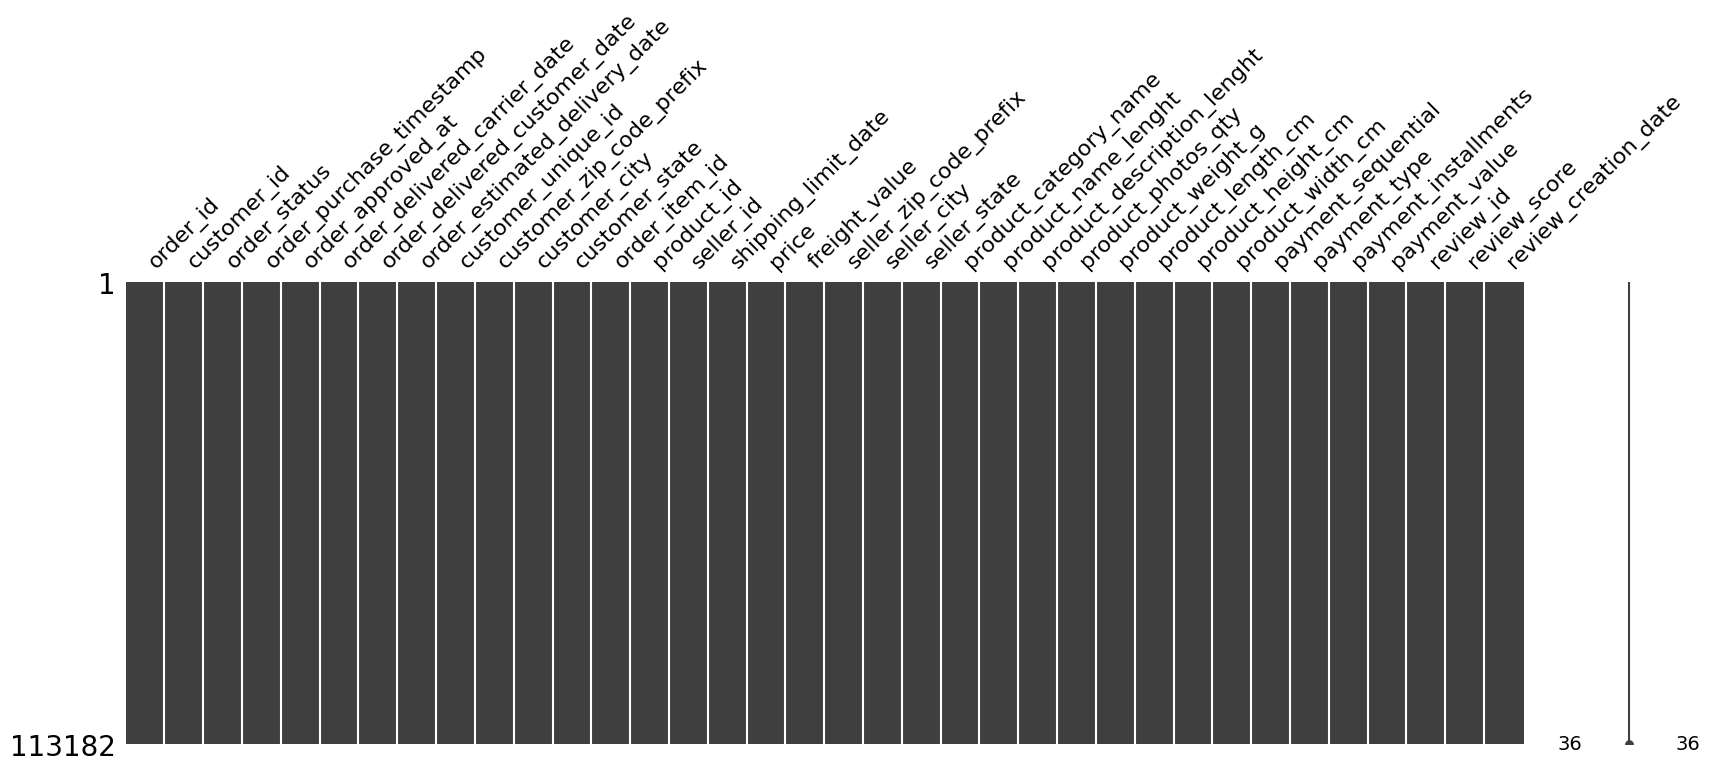

In [53]:
msno.matrix(df, figsize=(20, 6))
plt.show()

In [54]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,Delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,Sao Paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,Maua,SP,Housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1.0,Credit Card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,Delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,Sao Paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,Maua,SP,Housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3.0,Voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,Delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,Sao Paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,Maua,SP,Housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2.0,Voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,Delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,Barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,31570,Belo Horizonte,SP,Perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0,1.0,Boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,2018-08-08
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,Delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,Vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,14840,Guariba,SP,Auto,46.0,232.0,1.0,420.0,24.0,19.0,21.0,1.0,Credit Card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,2018-08-18


In [55]:
# df.to_csv(r'Olist Dataset - Clean.csv', index= False)